In [13]:
# -*- coding: utf-8 -*-
import pandas as pd 

#remove the warning
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Load the dataset
bike_data = pd.read_csv('/Users/home/Documents/GitHub/ADS-506-Final-Team-Project/day.csv')
# Summary of the dataset
print(bike_data.info())
print(bike_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
          instant      season          yr        mnth     holiday     weekday  \
count  

In [14]:
# check for missing values in the dataset
bike_data['dteday'] = pd.to_datetime(bike_data['dteday'])
bike_data['season'] = bike_data['season'].astype('category')
bike_data['yr'] = bike_data['yr'].astype('category')
bike_data['mnth'] = bike_data['mnth'].astype('category')
bike_data['holiday'] = bike_data['holiday'].astype('category')
bike_data['weekday'] = bike_data['weekday'].astype('category')
bike_data['workingday'] = bike_data['workingday'].astype('category')
bike_data['weathersit'] = bike_data['weathersit'].astype('category')
bike_data['temp'] = bike_data['temp'].astype('float')
bike_data['atemp'] = bike_data['atemp'].astype('float')
bike_data['hum'] = bike_data['hum'].astype('float')
bike_data['windspeed'] = bike_data['windspeed'].astype('float')
bike_data['casual'] = bike_data['casual'].astype('int')
bike_data['registered'] = bike_data['registered'].astype('int')
bike_data['cnt'] = bike_data['cnt'].astype('int')

# check for missing values
missing_values = bike_data.isnull().sum()
print(missing_values)

# check for duplicates
duplicates = bike_data.duplicated().sum()
print(duplicates)

# drop duplicates
bike_data = bike_data.drop_duplicates()
print(bike_data.info())

# check for duplicates
duplicates = bike_data.duplicated().sum()
print(duplicates)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       


In [15]:
# Key metrics for total rentals
print("Mean rentals:", bike_data['cnt'].mean())
print("Median rentals:", bike_data['cnt'].median())
print("Standard deviation:", bike_data['cnt'].std())

# Group by season and calculate metrics
season_metrics = bike_data.groupby('season')['cnt'].agg(['mean', 'median', 'std'])
print("Rental metrics by season:\n", season_metrics)

Mean rentals: 4504.3488372093025
Median rentals: 4548.0
Standard deviation: 1937.2114516187676
Rental metrics by season:
                mean  median          std
season                                  
1       2604.132597  2209.0  1399.942119
2       4992.331522  4941.5  1695.977235
3       5644.303191  5353.5  1459.800381
4       4728.162921  4634.5  1699.615261


/var/folders/q2/5yylt10156q8bq2drpk08r7w0000gn/T/ipykernel_80230/2749348784.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



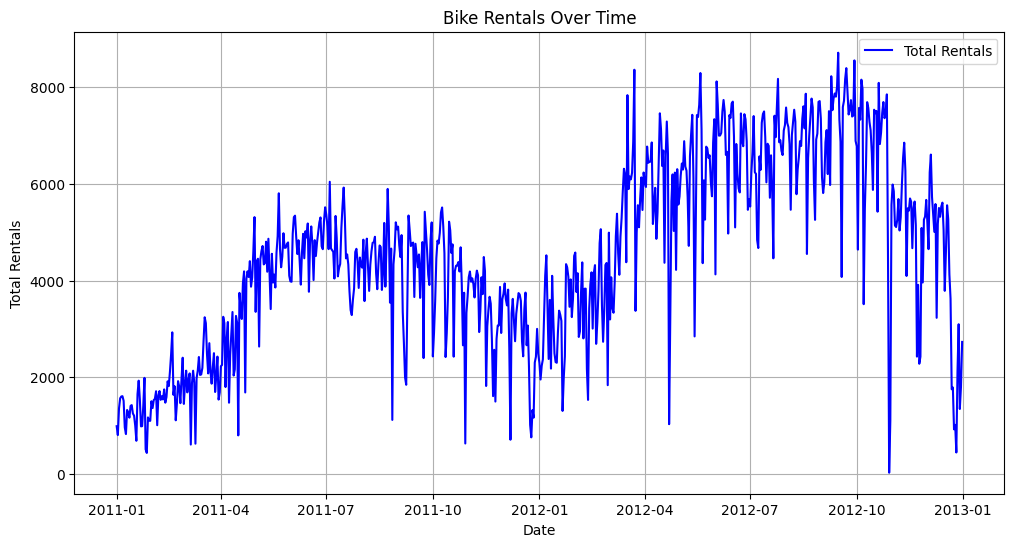

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'dteday' to datetime if not done
bike_data['dteday'] = pd.to_datetime(bike_data['dteday'])

# Line plot for total rentals over time
plt.figure(figsize=(12, 6))
plt.plot(bike_data['dteday'], bike_data['cnt'], label='Total Rentals', color='blue')
plt.title('Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.legend()
plt.grid()
plt.show()

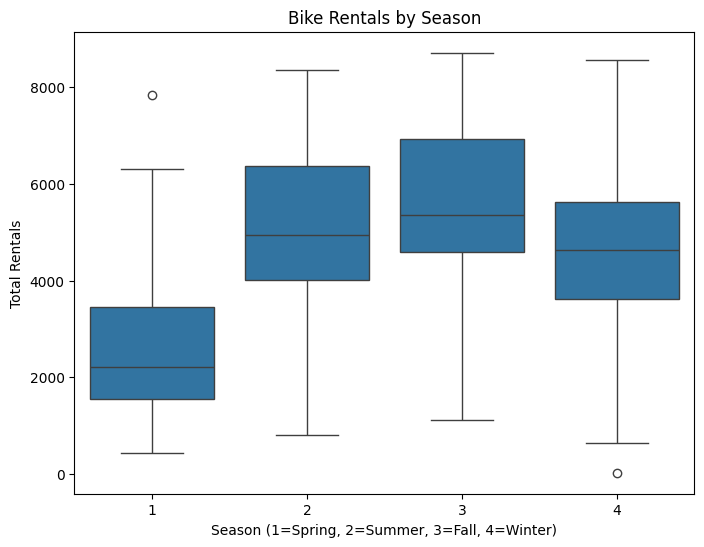

In [17]:
# Rentals by season
plt.figure(figsize=(8, 6))
sns.boxplot(x='season', y='cnt', data=bike_data)
plt.title('Bike Rentals by Season')
plt.xlabel('Season (1=Spring, 2=Summer, 3=Fall, 4=Winter)')
plt.ylabel('Total Rentals')
plt.show()

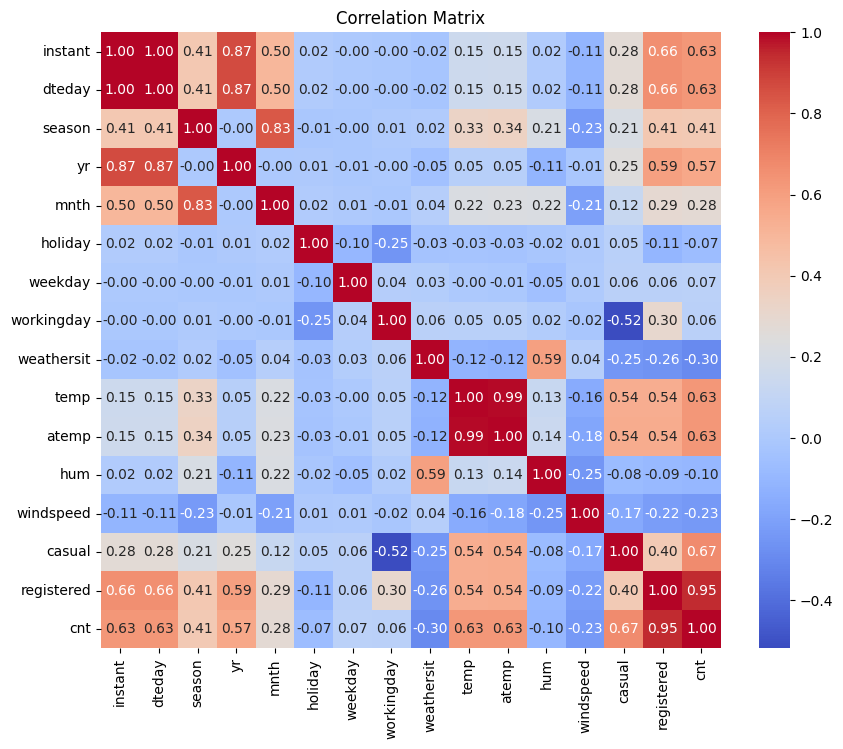

In [18]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = bike_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

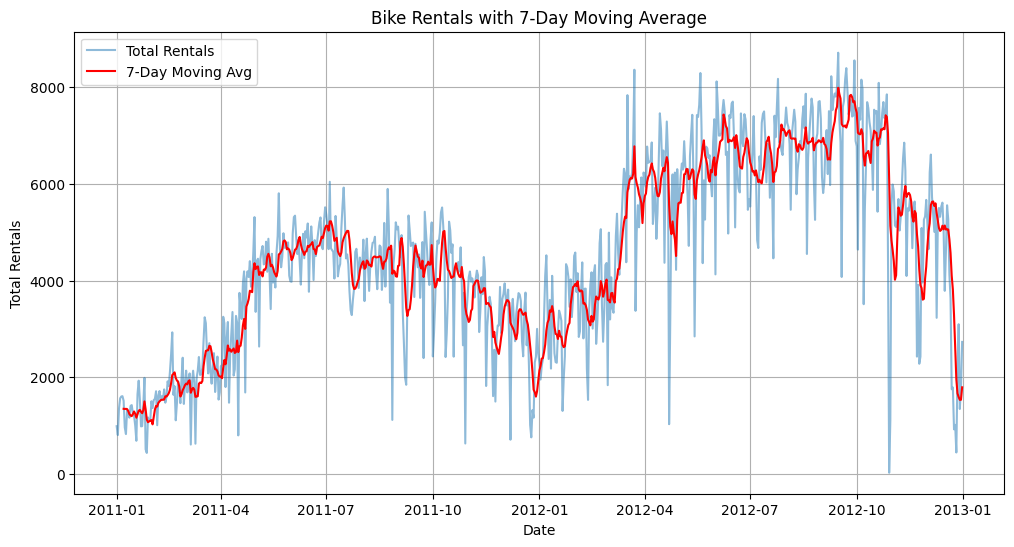

In [19]:
# Add a 7-day moving average of total rentals
bike_data['7_day_avg'] = bike_data['cnt'].rolling(window=7).mean()

# Plot rentals with a 7-day moving average
plt.figure(figsize=(12, 6))
plt.plot(bike_data['dteday'], bike_data['cnt'], label='Total Rentals', alpha=0.5)
plt.plot(bike_data['dteday'], bike_data['7_day_avg'], label='7-Day Moving Avg', color='red')
plt.title('Bike Rentals with 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.legend()
plt.grid()
plt.show()

In [20]:
!pip install plotly

import plotly.express as px
import plotly.io as pio


bike_data['30_day_avg'] = bike_data['cnt'].rolling(window=30).mean()

fig = px.line(bike_data, x='dteday', y='cnt', title='Bike Rentals with 30-Day Moving Average')
fig.add_scatter(x=bike_data['dteday'], y=bike_data['30_day_avg'], mode='lines', name='30-Day Moving Avg', line=dict(color='red'))
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Total Rentals')
fig.show()

pio.renderers.default = 'browser'

In [21]:
# Group data by year and month to observe trends
bike_data['year'] = bike_data['dteday'].dt.year
bike_data['month'] = bike_data['dteday'].dt.month

# Monthly average rentals
monthly_avg = bike_data.groupby(['year', 'month'])['cnt'].mean().reset_index()

# Plot monthly trends
import plotly.express as px
fig = px.line(monthly_avg, x='month', y='cnt', color='year',
              title='Monthly Average Bike Rentals (2011 vs 2012)',
              labels={'cnt': 'Average Rentals', 'month': 'Month'})
fig.show()


In [22]:
# Scatter plot with temperature and humidity
fig = px.scatter(bike_data, x='temp', y='cnt', size='hum', color='season',
                 title='Bike Rentals vs. Temperature and Humidity',
                 labels={'temp': 'Temperature', 'cnt': 'Total Rentals', 'hum': 'Humidity'})
fig.show()

In [23]:
# Highlight holidays
holiday_data = bike_data[bike_data['holiday'] == 1]

# Plot holidays
fig = px.scatter(holiday_data, x='dteday', y='cnt', color='season',
                 title='Bike Rentals on Holidays',
                 labels={'cnt': 'Total Rentals', 'dteday': 'Date'})
fig.show()

In [24]:
# Year-over-year comparison
yearly_avg = bike_data.groupby(['year'])['cnt'].mean().reset_index()
print("Yearly Average Rentals:\n", yearly_avg)

Yearly Average Rentals:
    year          cnt
0  2011  3405.761644
1  2012  5599.934426


In [25]:
# Identify categorical columns
categorical_columns = bike_data.select_dtypes(include=['category']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')


In [26]:
#removing the warning
pd.options.mode.chained_assignment = None


# Fill categorical columns with their mode (most frequent value)
for col in ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']:
    bike_data[col].fillna(bike_data[col].mode()[0], inplace=True)

/var/folders/q2/5yylt10156q8bq2drpk08r7w0000gn/T/ipykernel_80230/3692624462.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [27]:
# Fill numerical columns with 0
numerical_columns = bike_data.select_dtypes(exclude=['object', 'category']).columns
bike_data[numerical_columns] = bike_data[numerical_columns].fillna(0)

In [28]:
# Check if all missing values are filled
print("Missing values after handling:\n", bike_data.isnull().sum())

Missing values after handling:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
7_day_avg     0
30_day_avg    0
year          0
month         0
dtype: int64


In [29]:
# Add a new category 'Unknown' to categorical columns and fill missing values with it
for col in ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']:
    if bike_data[col].dtype.name == 'category':  # Ensure it's categorical
        bike_data[col] = bike_data[col].cat.add_categories("Unknown")
    bike_data[col].fillna("Unknown", inplace=True)

/var/folders/q2/5yylt10156q8bq2drpk08r7w0000gn/T/ipykernel_80230/1064944357.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [30]:
# Separate categorical and numeric columns
categorical_columns = bike_data.select_dtypes(include=['category']).columns
numerical_columns = bike_data.select_dtypes(exclude=['category']).columns

In [31]:
# Handle missing values in categorical columns
for col in categorical_columns:
    bike_data[col].fillna(bike_data[col].mode()[0], inplace=True)

# Handle missing values in numeric columns
bike_data[numerical_columns] = bike_data[numerical_columns].fillna(0)

/var/folders/q2/5yylt10156q8bq2drpk08r7w0000gn/T/ipykernel_80230/2331133481.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [32]:
# Add a new category 'Missing' and fill missing values in categorical columns
for col in categorical_columns:
    if bike_data[col].dtype.name == 'category':  # Ensure it's categorical
        bike_data[col] = bike_data[col].cat.add_categories("Missing")
    bike_data[col].fillna("Missing", inplace=True)

/var/folders/q2/5yylt10156q8bq2drpk08r7w0000gn/T/ipykernel_80230/632038099.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [33]:
print("Missing values after handling:\n", bike_data.isnull().sum())

Missing values after handling:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
7_day_avg     0
30_day_avg    0
year          0
month         0
dtype: int64


In [34]:
# Create lag features
bike_data['cnt_lag_1'] = bike_data['cnt'].shift(1)
bike_data['cnt_lag_7'] = bike_data['cnt'].shift(7)

# Fill missing values for lag features
bike_data[['cnt_lag_1', 'cnt_lag_7']] = bike_data[['cnt_lag_1', 'cnt_lag_7']].fillna(0)

In [35]:
# Extract day of the week
bike_data['day_of_week'] = bike_data['dteday'].dt.dayofweek  # 0=Monday, 6=Sunday

# Add a feature for weekends
bike_data['is_weekend'] = bike_data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Create interaction terms
bike_data['temp_hum'] = bike_data['temp'] * bike_data['hum']
bike_data['temp_wind'] = bike_data['temp'] * bike_data['windspeed']

# Verify the new features
print(bike_data[['day_of_week', 'is_weekend', 'temp_hum', 'temp_wind']].head())

   day_of_week  is_weekend  temp_hum  temp_wind
0            5           1  0.277341   0.055220
1            6           1  0.253012   0.090338
2            0           0  0.085865   0.048759
3            1           0  0.118087   0.032059
4            2           0  0.099170   0.042418


In [36]:
from sklearn.model_selection import train_test_split

# Drop irrelevant columns
X = bike_data.drop(['cnt', 'dteday', 'registered', 'casual'], axis=1)  # Features
y = bike_data['cnt']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (584, 22)
Testing set size: (147, 22)


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
print("Linear Regression Performance:")
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R²:", r2_score(y_test, y_pred))

Linear Regression Performance:
RMSE: 760.2859638120533
R²: 0.8558474525760155


/Users/home/Documents/GitHub/ADS-506-Final-Team-Project/.venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [52]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# ------------------------
# Step 1: Load and Inspect the Data
# ------------------------
# Load the dataset
bike_data = pd.read_csv('/Users/home/Documents/GitHub/ADS-506-Final-Team-Project/day.csv')

# Display basic information
print("Dataset Overview:")
print(bike_data.info())
print(bike_data.head())

# Check for missing values
print("Missing values:", bike_data.isnull().sum())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
   instant      dteday  season  yr  mnth  holiday  weekday  workingday

In [56]:

# Step 2: Data Preprocessing and Feature Engineering
# ------------------------
# Convert 'dteday' to datetime
bike_data['dteday'] = pd.to_datetime(bike_data['dteday'])

# Extract additional features (month, day of week)
bike_data['month'] = bike_data['dteday'].dt.month
bike_data['day_of_week'] = bike_data['dteday'].dt.dayofweek

# Drop irrelevant columns
X = bike_data.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt'])  # Features
y = bike_data['cnt']  # Target variable

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['season', 'month', 'day_of_week', 'weathersit'], drop_first=True)

# Display feature names
print("Features after preprocessing:")
print(X.columns)


Features after preprocessing:
Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')


In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure all columns are numeric
X_numeric = X.select_dtypes(include=[np.number])

# Calculate VIF (Variance Inflation Factor)
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif = calculate_vif(X_numeric)
print("\nVariance Inflation Factor (VIF):")
print(vif)


Variance Inflation Factor (VIF):
      Feature         VIF
0          yr    1.952514
1        mnth    5.029057
2     holiday    1.098088
3     weekday    3.089698
4  workingday    3.264162
5        temp  491.383702
6       atemp  550.837898
7         hum   13.515133
8   windspeed    5.090936


In [61]:
# Remove highly collinear features (if necessary)
# Example: if 'temp' and 'atemp' are highly correlated, you might remove one.
# Drop the highly collinear feature ('atemp') to reduce multicollinearity
X_reduced = X.drop(columns=['atemp'])

# Ensure all columns are numeric before calculating VIF
X_reduced_numeric = X_reduced.select_dtypes(include=[np.number])

# Recalculate VIF after dropping the feature
vif_reduced = calculate_vif(X_reduced_numeric)
print("\nUpdated Variance Inflation Factor (VIF):")
print(vif_reduced)



# Step 3: Train-Test Split




Updated Variance Inflation Factor (VIF):
      Feature        VIF
0          yr   1.944520
1        mnth   5.003131
2     holiday   1.098060
3     weekday   3.088377
4  workingday   3.255706
5        temp   8.021495
6         hum  11.923549
7   windspeed   5.090807


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (657, 31)
Testing set size: (74, 31)


In [64]:
lr_model = LinearRegression()

# Perform cross-validation to evaluate performance
cv_scores = cross_val_score(lr_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
cv_rmse = np.sqrt(-cv_scores)

print("Cross-validated RMSE (mean):", cv_rmse.mean())
print("Cross-validated RMSE (std):", cv_rmse.std())

# Train the model on the full training set
lr_model.fit(X_train, y_train)

Cross-validated RMSE (mean): 797.9971912632515
Cross-validated RMSE (std): 58.95927042469013


LinearRegression()

In [65]:
# ------------------------
# Step 6: Make Predictions and Evaluate the Model
# ------------------------
# Predict on the test set
y_pred = lr_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Performance on Test Set:")
print("RMSE:", rmse)
print("R²:", r2)


Model Performance on Test Set:
RMSE: 779.4290827359777
R²: 0.8620306247931178



Top features influencing bike rentals:
     Feature  Coefficient
5       temp  3805.277689
0         yr  1997.430480
11  season_4  1648.928719
6      atemp   995.216738
9   season_2   897.447003
10  season_3   824.342964
19   month_9   701.849785
15   month_5   534.208522
13   month_3   474.334561
14   month_4   295.693672


/var/folders/q2/5yylt10156q8bq2drpk08r7w0000gn/T/ipykernel_80230/3330417601.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




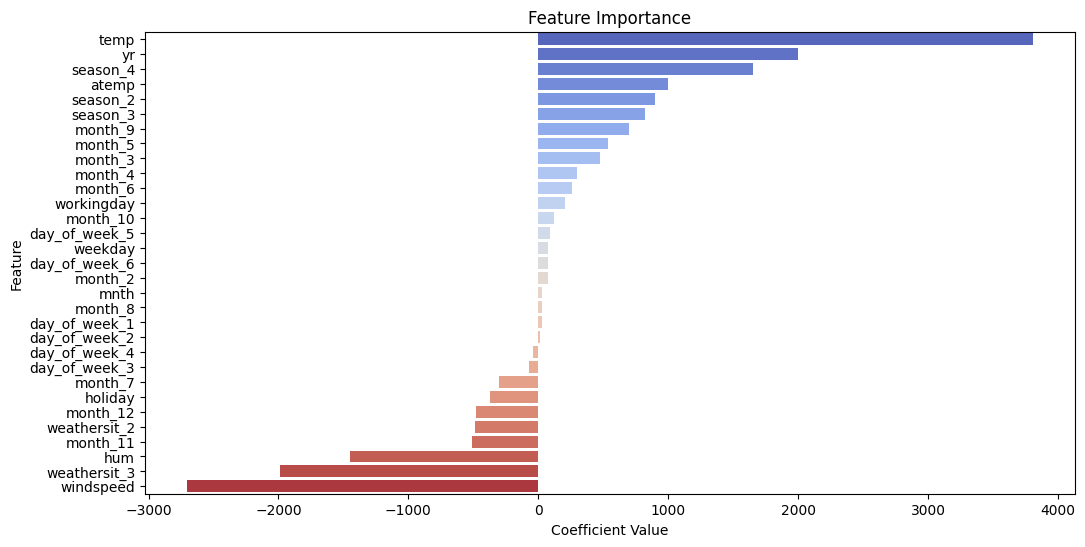

In [66]:
# ------------------------
# Step 7: Interpret the Model (Feature Importance)
# ------------------------
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr_model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Display top features
print("\nTop features influencing bike rentals:")
print(coefficients.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=coefficients, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

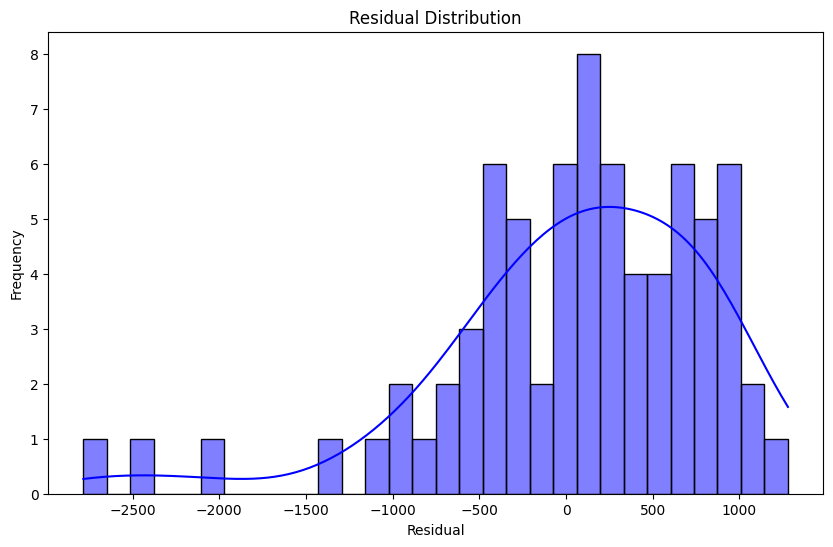

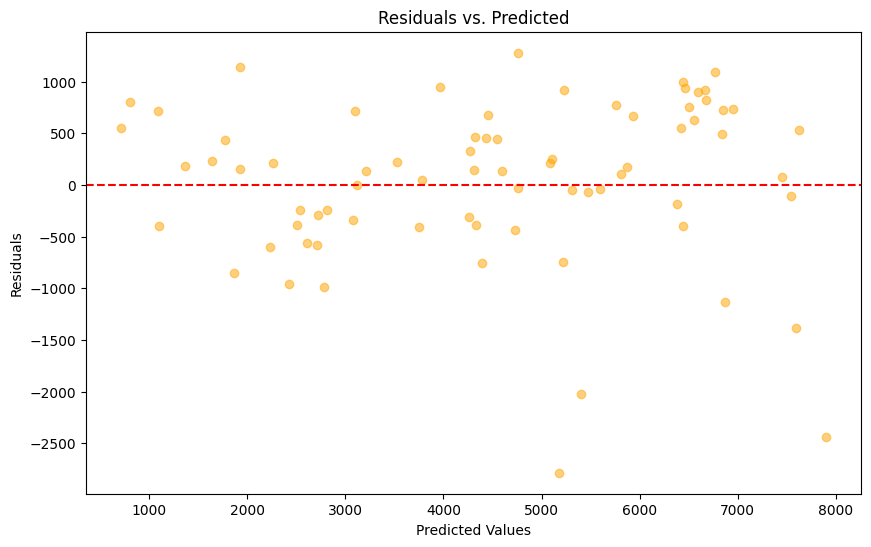

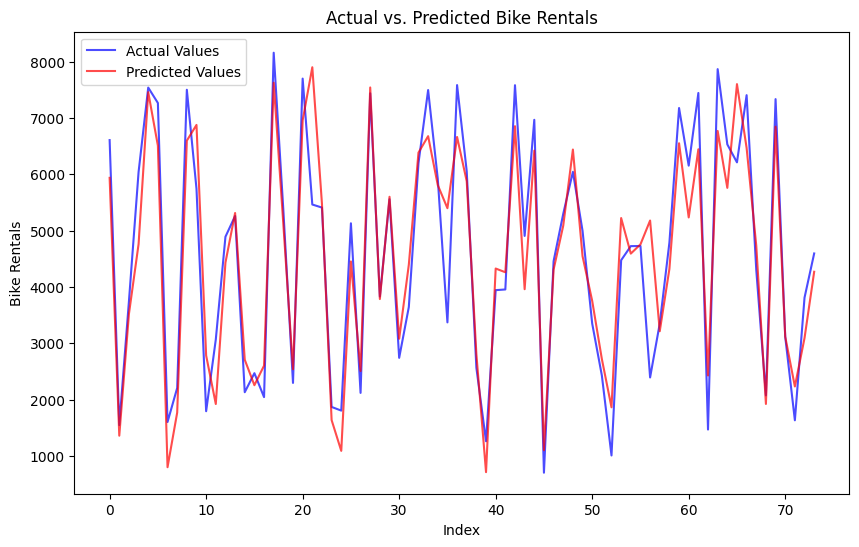

In [67]:
# ------------------------
# Step 8: Residual Analysis
# ------------------------
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title('Residual Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Residual scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# ------------------------
# Step 9: Visualize Actual vs. Predicted
# ------------------------
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', color='blue', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', color='red', alpha=0.7)
plt.title('Actual vs. Predicted Bike Rentals')
plt.xlabel('Index')
plt.ylabel('Bike Rentals')
plt.legend()
plt.show()